# PDA data science - HERE MAP API
<div class="alert alert-block alert-info"> 
    Notebook 5: by michael.ferrie@edinburghcollege.ac.uk <br> Edinburgh College, March 2022
</div>

#### Introduction
In this notebook we will learn to use a REST API to generate interactive maps.

#### Getting Started

[HERE technologies](https://www.here.com/company/about-us) are a company who have a mission to enable a digital representation of reality to radically improve the way the world moves, lives and interacts. With 35 years of experience in mapmaking and 8,000 employees across 56 countries, they are the world's leading location platform company. Today, more than 160 million vehicles run on HERE map data. Our global ecosystem of customers, partners and developers across a variety of industries includes some of the biggest and best-known brands.

HERE offer a public API, in this notebook we will practice using that API to generate maps. There first thing we need to do is install there HERE python library using pip:

`pip install here-map-widget-for-jupyter`


Next we will need to set up a free developer account, go to this web sight, click 'sign up' at the top right of the page and create a free developer account: https://developer.here.com/

The company name is not important in the sign up process, just make something up.

#### REST API's

A REST API (also known as RESTful API) is an application programming interface (API or web API) that conforms to the constraints of REST architectural style and allows for interaction with RESTful web services. REST stands for <b>representational state transfer</b> and was created by computer scientist Roy Fielding.

When a client request is made via a RESTful API, it transfers a representation of the state of the resource to the requester or endpoint. This information, or representation, is delivered in one of several formats via HTTP: JSON (Javascript Object Notation), HTML, XLT, Python, PHP, or plain text. JSON is the most generally popular file format to use because, despite its name, it’s language-agnostic, as well as readable by both humans and machines.

REST APIs communicate via HTTP requests to perform standard database functions like creating, reading, updating, and deleting records (also known as CRUD) within a resource. For example, a REST API would use a GET request to retrieve a record, a POST request to create one, a PUT request to update a record, and a DELETE request to delete one. All HTTP methods can be used in API calls. A well-designed REST API is similar to a website running in a web browser with built-in HTTP functionality.

#### Getting logged in

Verify your account with the email you used to set it up. Once you have logged in. There is a section called REST that looks like this:

![image.png](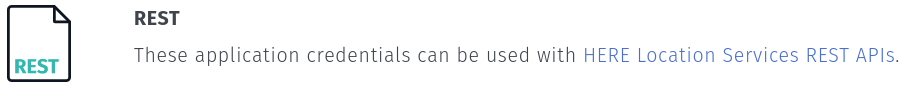
)

Click the button underneath to generate and app:

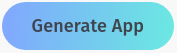

Now clikc this button to generate your API key and then add it to the API and then add this to the space in the code cell below:

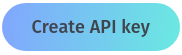

In [ ]:
api_key = "API KEY IN HERE!" # <-- Put your API key in here

#### Getting a response from the API

We need to import some libraries from the here map widget first and then we can send a requestion for a map. In this simple example I am going to send the longitude and latitude of Edinburgh to the API, we will need to pass our API key with the request.

A shortcut for getting longitude and latitude in the UK is to use the post code, there is a [useful site](https://www.freemaptools.com/convert-uk-postcode-to-lat-lng.htm) that can do this for us.

In [ ]:
# Import libraries
from here_map_widget import Map, Marker, ZoomControl

# Create map, set the centre on edinburgh and set the zoom level 
m = Map(api_key=api_key, center=[55.953252, -3.188267], zoom=12)

# Display results
m

#### Adding GeoPandas to the Map

For this map we need to install a library called [GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html), run this in a terminal:

`pip install geopandas`

If you are running windows you may need to install pipwin for this step, if you get errors, install the following - this may take a few minutes to run:

```python
pip install wheel

pip install pipwin

pipwin install numpy

pipwin install pandas

pipwin install shapely

pipwin install gdal

pipwin install fiona

pipwin install pyproj

pipwin install six

pipwin install rtree

pipwin install geopandas

```

GeoPandas, as the name suggests, extends the popular data science library pandas by adding support for geospatial data. The core data structure in GeoPandas is the geopandas.GeoDataFrame, a subclass of pandas.DataFrame, that can store geometry columns and perform spatial operations.

In [ ]:
# import libraries
from here_map_widget import Map, GeoData
import geopandas
import json

# Create the world map dataframe using geopandas and generate map
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
m = Map(api_key=api_key, center=[55, -3], zoom=4)

# Create geo data fill colours, then add to map
geo_data = GeoData(geo_dataframe=world, style={"fillColor": "#ccffcc"},
    hover_style={"fillColor": "red"}, show_bubble=True)
m.add_layer(geo_data)

# Display map
m

#### Placing markers over a location

A useful feature of a map is to be able to place it over a particular location, we can do this using the `add_object` function. We also need to specify the markers location:

```
marker = Marker(lat=52.53075, lng=13.3851)
m.add_object(marker)
m
```

Another feature we can add is a zoom control, we can do this using the `add_control` function.

In [ ]:
# Recreate our first map of Edinburgh
m = Map(api_key=api_key, center=[55.953252, -3.188267], zoom=12)

# Create a variable called marker, then add to map
marker = Marker(lat=55.953252, lng=-3.188267)
m.add_object(marker)

# Display map
m

The last example was quite basic, only a single blue marker. Adding more detail to the Marker, we can set an infobox pop-up to appear above it.

The info box can be defined in an HTML tag, in this example we have set the infobox above the botanic garden. 

In [ ]:
# Import libraries
from here_map_widget import Map, Marker, Point, InfoBubble

# Generate map, set location and zoom
m = Map(api_key=api_key)
m.center = [55.953252, -3.188267]
m.zoom = 12

# Create info bubble
info = InfoBubble(position=Point(lat=55.965274, lng=-3.202759),
    content='<div><a href="https://www.rbge.org.uk/"'
    + 'target="_blank">Royal Botanic Garden Edinburgh</a> </div>')

# Create marker, and add info to it
botanic_marker = Marker(lat=55.953252, lng=-3.202759, 
                        info=info, evt_type="tap", show_bubble=True)

# Add marker to map, then display
m.add_object(botanic_marker)
m

#### Tilt Slider
Adding a tile slider to the map will allow us to tile the map to get a different view.

In [ ]:
# Import libraries
from here_map_widget import WidgetControl, Map
from ipywidgets import FloatSlider, ColorPicker, jslink

# Create map and set API key
m = Map(api_key=api_key)
m.center = [55.953252, -3.188267]
m.zoom = 12


# Set up zoom slider
zoom_slider = FloatSlider(description='Tilt level:', min=0, max=90, value=0)
jslink((zoom_slider, 'value'), (m, 'tilt'))
widget_control1 = WidgetControl(widget=zoom_slider, alignment="TOP_RIGHT", name="FloatSlider")#

# Add object to map and display
m.add_control(widget_control1)
m

#### Marker clusters

Notice in this example instead of using `m.centre` and `m.zoom` we can pass these right into the map function. There are many more examples available in the API in the documentation here: 
https://here-map-widget-for-jupyter.readthedocs.io/en/latest/api_reference/geometry/bbox.html

In [ ]:
# Import libraries
import os
from here_map_widget import Map, MarkerCluster, ZoomControl, ObjectLayer

# Create Map
m = Map(api_key=api_key, center=[51.01, 0.01], zoom=7)

# Create popup with HTML
data = """
<!DOCTYPE html>
<html>
<body>
<h3>Marker</h3>
<p>{}</p>
</body>
</html>
"""

# Create markers
p1 = dict(lat=51.01, lng=0.01, data=data.format("First Marker"))
p2 = dict(lat=50.04, lng=1.01, data=data.format("Second Marker"))
p3 = dict(lat=51.45, lng=1.01, data=data.format("Third Marker"))
p4 = dict(lat=51.01, lng=2.01, data=data.format("Fourth Marker"))

# Add the marker cluster layer to the map
provider = MarkerCluster(data_points=[p1, p2, p3, p4], show_bubble=True)
layer = ObjectLayer(provider=provider)

# Add the markers and display
m.add_layer(layer)
m

#### Photo maps

A little bit of extra code will get us a photo style map, using this handy Lat/Long finder https://www.doogal.co.uk/LatLong.php I was able to centre this on Edinburgh Castle.

Try changing the long/lat operations at the end to see the zoom level and location and how this is affected.

This was adapted from the example here: https://here-map-widget-for-jupyter.readthedocs.io/en/latest/api_reference/basemap/map_tile.html


In [ ]:
# Import libraries
from here_map_widget import Map, Platform, MapTile, TileLayer
from here_map_widget import ServiceNames, MapTileUrl

# Set up connection to the api to get the map
services_config = { ServiceNames.maptile: {
        MapTileUrl.scheme: "https",
        MapTileUrl.host: "maps.ls.hereapi.com",
        MapTileUrl.path: "maptile/2.1",}
}
platform = Platform(api_key=api_key, services_config=services_config)

# Set map options
maptile = MapTile(tile_type="maptile",
    scheme="hybrid.day",
    tile_size=512,
    format="jpg",
    platform=platform,
    type="aerial")

maptile_layer = TileLayer(provider=maptile, style={"max": 22})

# Set location and display
m = Map(api_key=api_key, center=[55.9486, -3.1999], zoom=15, basemap=maptile_layer)
m

### Postcodes.io API

There is a public API in the UK that will reply with a post code if you send it the address, or even more useful it will reply with the latitude and longitude. It is called [postcodes.io](postcodes.io) There is no authentication required.

In order to work with this API we need to import requests. We can sent it a message and it will reply with an HTTP status code of 200 if the message was received.

In [ ]:
# import requests
import requests

# Create a variable called response, then print result
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

#### Asking for more information from the API

This time we will send the API a postcode and see if it can reply with some information about that postcode, you will see that we use the `get` function of the requests library. The using the `json` function we can print the result.

In [ ]:
# Import 
import requests
import json

# Set up the request and ask the api for a post code
r = requests.get("https://api.postcodes.io/postcodes/EH51QE")

# Notice when we print r we get the reposnse code
print(r)

# R.json gives us the reply
print(r.json())

In [ ]:
#convert it to a dict, and strip the results to a new dict
my_data = r.json()

#### Working with the data

Now we have the data in a dictionary we can select items by key, it is actually 3 dictionaries, notice the }}} at the end, let's remove the results section to a new dictionary. 

In [ ]:
# Pull out the results
my_results = my_data['result']

#Print results
print(my_results)

# Now we can select results by key
print(my_results['nhs_ha'])
print(my_results['european_electoral_region'])

# Questions
Add your answers to the questions here.

#### Create a program that asks a user to enter their post code and then returns their postcode longitude and latitude?

In [ ]:
# your code below this line


#### According to the [API documentation](https://postcodes.io/docs) You can lookup a Scottish postcode this will return Scottish Parliamentary Constituency. 

It Returns 404 if postcode does not exist in SPD or is not valid. For postcodes not in SPD but in ONSPD, 404 is returned with error message Postcode exists in ONSPD but not in SPD. GET https://api.postcodes.io/scotland/postcodes/:postcode

Write a program for Scottish users, if they enter their postcode it will tell them what their Scottish Parliamentary constituency is based on their postcode. If they enter a postcode that is not in Scotland, make the program print an error?

In [ ]:
# your code below this line


#### Write a program that uses the post code API to validate a postcode that is entered by the user?

In [ ]:
# your code below this line


#### Write a program that will help users with a map, use the Postcode API first then use the HERE API to generate the map. Your program should ask the user to enter their postcode and then use this as the centre of the map, return a map of the area around the post code?

In [ ]:
# your code below this line


#### Adapt your program from the previous question to add tilt functionality to the map?

In [ ]:
# your code below this line


#### Adapt your program from the previous question to add a marker with an info pop-up to the Map saying "You are here!" to show the user where they are on the map.

In [ ]:
# your code below this line


#### Use the postcodes api to get a random postcode, then use that as the centre for a photo map?

In [ ]:
# your code below this line


#### Make a map of your home town and show 3 places of interest as markers that the user can click on, you can either use markers and pop-ups, or use a marker cluster?

In [ ]:
# your code below this line
